In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_long = pd.read_csv('../data/processed/df_long.csv')
df_delta=pd.read_csv('../data/processed/df_delta.csv')

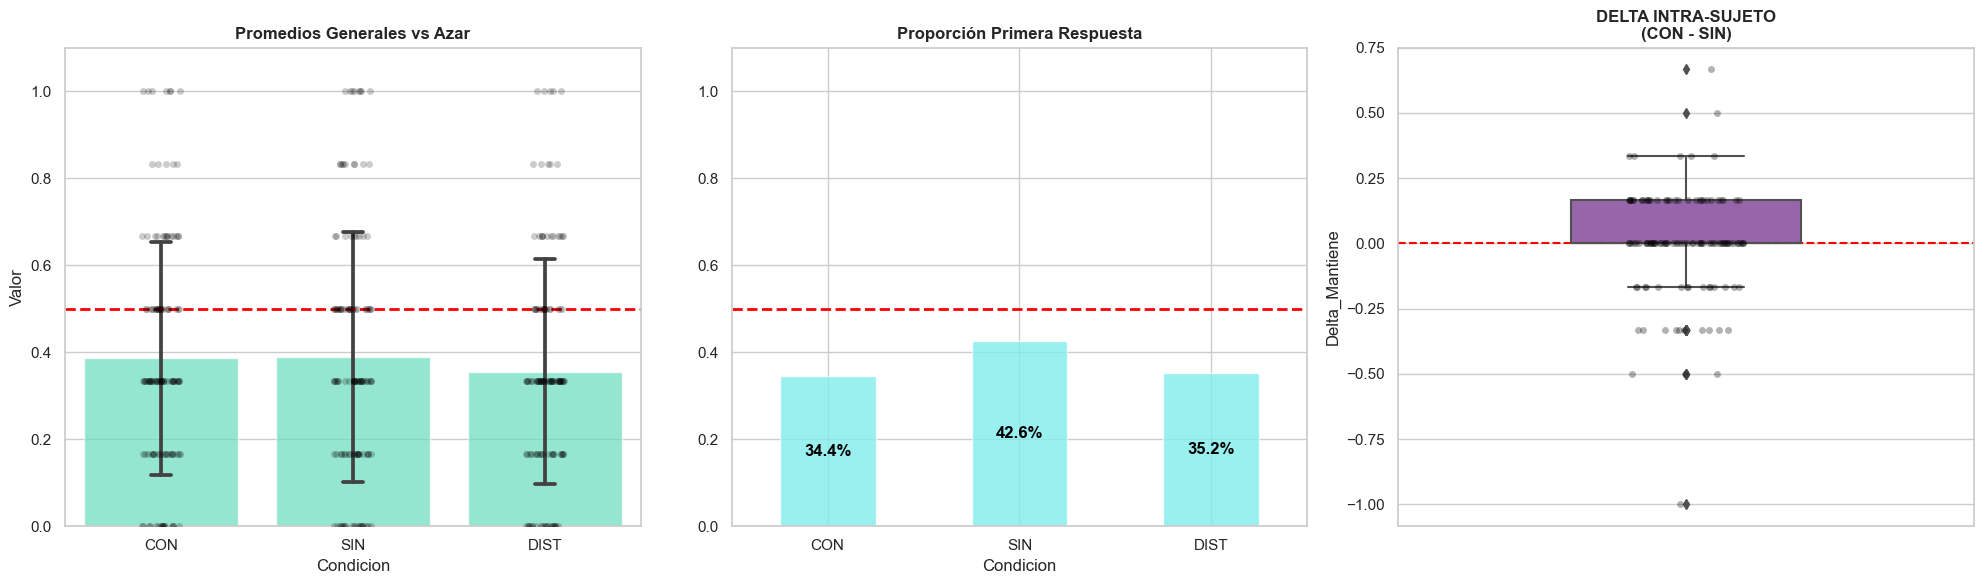

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. PREPARACIÓN DE DATOS ---
df_unicos = df_long.drop_duplicates(subset=['ID_Sujeto']).copy()

# Cálculo del Delta (Asegúrate de que estas columnas existan en df_unicos)
df_unicos['Delta_Mantiene'] = df_unicos['Promedio_CON'] - df_unicos['Promedio_SIN']

df_proms = df_unicos.melt(id_vars='ID_Sujeto', 
                          value_vars=['Promedio_CON', 'Promedio_SIN', 'Promedio_DIST'],
                          var_name='Condicion', value_name='Valor')
df_proms['Condicion'] = df_proms['Condicion'].str.replace('Promedio_', '')

df_cat1 = df_long[df_long['Categoria'] == 1].copy()
def mapear(n):
    n = str(n).upper()
    return 'CON' if 'CON' in n else 'SIN' if 'SIN' in n else 'DIST' if 'DIST' in n else n
df_cat1['Condicion'] = df_cat1['Dilema'].apply(mapear)

orden = ['CON', 'SIN', 'DIST']

# --- 2. VISUALIZACIÓN (Panel de 3 ejes) ---

sns.set_theme(style="whitegrid")
# CORRECCIÓN: Definimos 3 subplots (1 fila, 3 columnas)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# GRÁFICO 1: PROMEDIOS VS 50/50
sns.barplot(data=df_proms, x='Condicion', y='Valor', order=orden,
            errorbar='sd', capsize=.1, color='#55efc4', alpha=0.7, ax=ax1)
sns.stripplot(data=df_proms, x='Condicion', y='Valor', order=orden,
              color='black', alpha=0.2, ax=ax1)
ax1.axhline(0.5, color='red', linestyle='--', linewidth=2, label='Azar (0.5)')
ax1.set_title('Promedios Generales vs Azar', fontsize=12, fontweight='bold')
ax1.set_ylim(0, 1.1)

# GRÁFICO 2: PRIMERA RESPUESTA VS 50/50
tab_prop = df_cat1.groupby('Condicion')['Mantiene'].mean().loc[orden]
tab_prop.plot(kind='bar', color='#81ecec', alpha=0.8, ax=ax2, rot=0)
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.1%}', (p.get_x() + p.get_width()/2, p.get_height()/2),
                 ha='center', va='center', color='black', fontweight='bold')
ax2.axhline(0.5, color='red', linestyle='--', linewidth=2)
ax2.set_title('Proporción Primera Respuesta', fontsize=12, fontweight='bold')
ax2.set_ylim(0, 1.1)

# GRÁFICO 3: BOXPLOT DEL DELTA
sns.boxplot(y=df_unicos['Delta_Mantiene'], color='#9b59b6', width=0.4, fliersize=5, ax=ax3)
sns.stripplot(y=df_unicos['Delta_Mantiene'], color='black', alpha=0.3, jitter=True, ax=ax3)
ax3.axhline(0, color='red', linestyle='--', linewidth=1.5, label='Sin diferencia (0)')
ax3.set_title('DELTA INTRA-SUJETO\n(CON - SIN)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/plots/panel_completo_final.png', dpi=300)
plt.show() # Solo una vez al final